# Hipotezy

Proszę mi wybaczyć, niestety pod sam koniec zorientowałem się, że bezmyślnie zmergowałem dwie tabelki dostępnym skryptem w R. Operuję więc tylko na powtarzających się częściowo rekordach, więc niektóre wyniki mogą być przekłamane.

## Libki

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot

## Dataset

In [2]:
df = pd.read_csv('student.csv', sep=';')
df = df.dropna()
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
1,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
2,GP,F,15,R,GT3,T,1,1,other,other,...,3,3,4,2,4,5,2,13,11,11
3,GP,F,15,R,GT3,T,2,2,at_home,other,...,4,3,1,1,1,2,8,14,13,12
4,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,11,10
5,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,2,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,MS,M,18,U,LE3,T,1,3,at_home,services,...,4,3,3,2,3,3,0,9,10,9
379,MS,M,18,U,LE3,T,4,4,teacher,services,...,4,2,2,2,2,5,0,15,16,16
380,MS,M,19,R,GT3,T,1,1,other,other,...,4,4,4,3,3,5,4,8,9,10
381,MS,M,19,R,GT3,T,1,1,other,services,...,5,4,4,3,3,2,8,10,9,11


## H1

Na początek sprawdzę totalny banał. Mianowicie czy średnie wyniki końcowe pomiędzy płciami różnią się istotnie. Wykorzystam do tego pewien test statystyczny, którego nazwy nie pamiętam, ale działa dla dużych prób przy nieznanych wariancjach.

In [3]:
x_boys = df.loc[df.loc[:, "sex"] == "M", "G3.y"]
x_girls = df.loc[df.loc[:, "sex"] == "F", "G3.y"]

Przyjmijmy oczywiście standardowe alpha = 0,05. Statystyka testowa $T=(\bar{x_b}-\bar{x_g})/\sqrt{\frac{S_xb^2}{n_xb}+\frac{S_xg^2}{n_xg}}$.  
Z obszarem krytycznym obustronnym. Ufff... Zatem:

In [4]:
(x_boys.mean()-x_girls.mean())/( math.sqrt(x_boys.var()/len(x_boys) + x_girls.var()/len(x_girls)) )

-3.9630232215901717

Zdecydowanie wpada nam to w ogonek obszaru krytycznego. Możemy zatem wnioskować, że 'Girls Get It Done' i istotnie przodują w końcowych wynikach nad chłopcami. (Tak naprawdę jest to mało ambitny i kreatywny przykład, ale w ramach rekompensaty tego lenistwa, stawiam hipotezę bonusową: co najmniej połowa oddanych prac domowych będzie zawierać hipotezę "chłopcy vs dziewczyny". Zawrę to w mojej kolejnej PD)

## H2

To może już dość tych testów statystycznych. Swoje się już popisałem.  
Postawmy teraz hipotezę następującą: czy studenci pijący dużo alkoholu, olewają pierwszy termin i przykładają się dopiero do drugiego?  
Trzeba jeszcze jakoś zdefiniować dużo. Przyjmijmy sobie, że bierzemy pod uwagę picie w tygodniu na poziomie [3, 5] lub w weekendy [4, 5]. Dlaczego? Bo niewiele wiemy o tych wskaźnikach, a coś przyjąć trzeba.

In [5]:
drinking_indexes = np.logical_or(df.loc[:, "Dalc.y"] > 2, df.loc[:, "Walc.y"] > 3)
g1_drinking = df.loc[drinking_indexes, "G1.y"]
g2_drinking = df.loc[drinking_indexes, "G2.y"]

In [6]:
sober_indexes = np.logical_not(drinking_indexes)
g1_sober = df.loc[sober_indexes, "G1.y"]
g2_sober = df.loc[sober_indexes, "G2.y"]

In [7]:
(g2_drinking - g1_drinking).mean()

-0.047058823529411764

In [8]:
(g2_sober - g1_sober).mean()

0.1750841750841751

Co ciekawe okazało się trochę na odwrót, czyli że to bardziej trzeźwi studenci poprawiają swoje wyniki a pijący pogarszają. Ale skoro już jesteśmy przy tym temacie...

## H3

Czy często pijący studenci radzą sobie generalnie gorzej od pijących rzadziej?

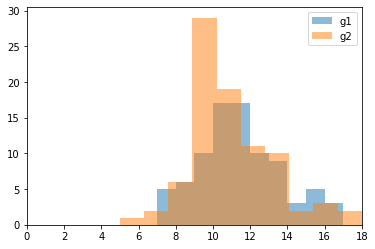

In [9]:
pyplot.hist(g1_drinking, alpha=0.5, label='g1')
pyplot.hist(g2_drinking, alpha=0.5, label='g2')
pyplot.xlim(0, 18)
pyplot.legend(loc='upper right')
pyplot.show()

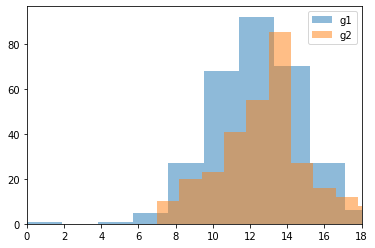

In [10]:
pyplot.hist(g1_sober, alpha=0.5, label='g1')
pyplot.hist(g2_sober, alpha=0.5, label='g2')
pyplot.xlim(0, 18)
pyplot.legend(loc='upper right')
pyplot.show()

Generalnie gołym okiem widać, że tak. Ale co ciekawe są to róznice raczej drugiego terminu, pierwszy wypozycjonowany jest dość centralnie w obu przypadkch (wciąż mamy oczywiście różnicę średniej na poziomie 1/2 pkt). Drugi termin zdecydowanie przechyla szalę na rzecz studentów utrzymujących wyższy poziom trzeźwości.

## H4

Słyszałem kiedyś, że ludzie kochający są zdrowsi. To niech będzie moją kolejną hipotezą.

In [11]:
romantic = df.loc[df.loc[:, "romantic.y"] == "yes", "health.y"]
alone = df.loc[df.loc[:, "romantic.y"] == "no", "health.y"] # ta nazwa zmiennej to tylko taki żarcik

In [12]:
romantic.mean() - alone.mean()

0.1578303041717679

In [13]:
romantic.mean()/alone.mean()*100 - 100

4.477332834664608

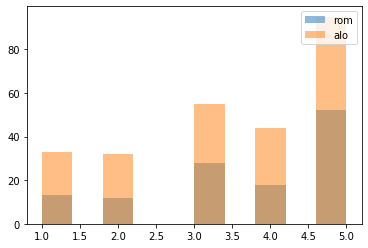

In [14]:
pyplot.hist(romantic, alpha=0.5, label='rom')
pyplot.hist(alone, alpha=0.5, label='alo')
pyplot.legend(loc='upper right')
pyplot.show()

Rozkłady są na pierwszy rzut oka niemal indentyczne, jednak różnica w średniej zachodzi na poziomie prawie 5% (ku mojemu zaskoczeniu). Jestem w takim razie w stanie uwierzyć, że jednak ziarnko prawdy w tym jest.

## H5

To ostatnia ciekawostka do sprawdzenia: czy studenci, którzy uczęszczali do przedszkola, mają teraz lepsze kontakty towarzyskie?

In [15]:
nursery = df.loc[df.loc[:, "nursery"] == "yes", "goout.y"]
home = df.loc[df.loc[:, "nursery"] == "no", "goout.y"]

In [16]:
nursery.mean() - home.mean()

-0.0431003584229388

Nie dość, że ta różnica jest bardzo mała, to jeszcze:

In [17]:
len(nursery) / len(home)

4.305555555555555

To mamy aż 4 razy więcej rekorków, od osób które chodziło do przedszkola. Tak mały błąd jest zatem jak najbardziej dopuszczalny, a postawioną hipotezę należy odrzucić.